IMPORT LIBRARIES

In [ ]:
## import libraries to use
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline

LOAD DATASET

In [ ]:
train = pd.read_csv('/content/train.csv')

Explore and Visualize my Data

In [ ]:
train.head(3)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760


In [ ]:
train.shape

(15289, 18)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [ ]:
train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [ ]:
train.drop('id',axis=1,inplace=True)

EDA

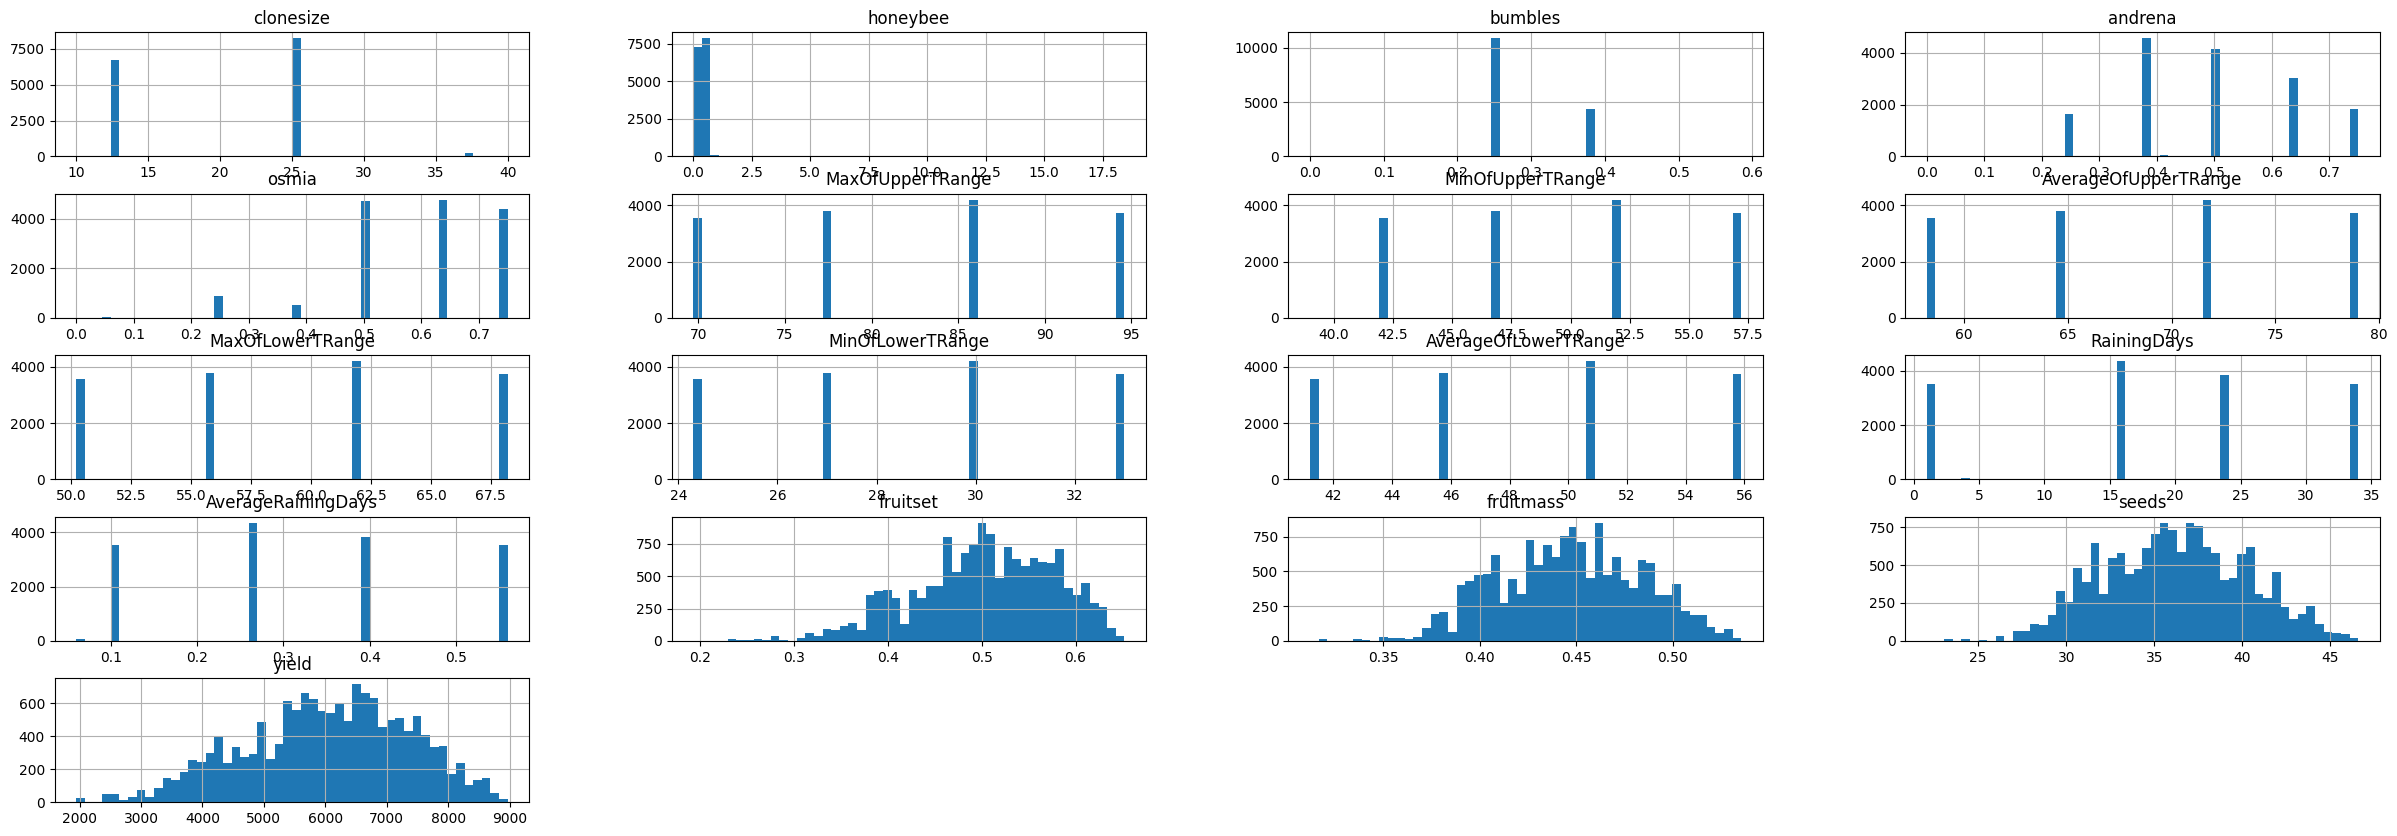

In [ ]:
## Histogram to understand the distribution
train.hist(figsize=(30,10), bins=50)
plt.subplots_adjust()

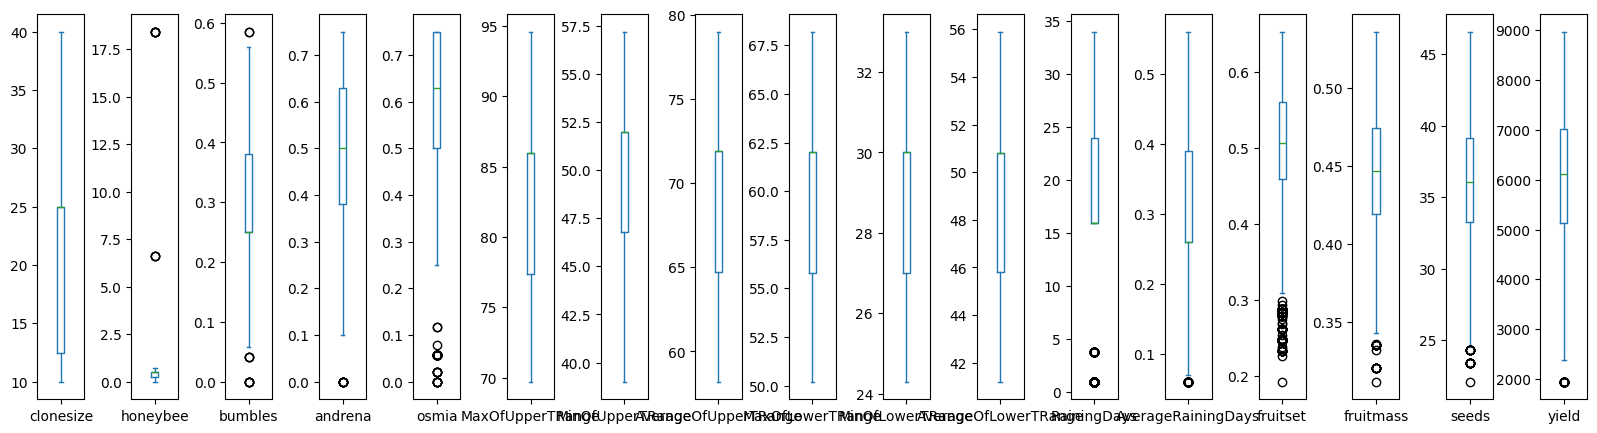

In [ ]:
## Boxplot to identify Outliers
train.plot(kind='box',subplots= True, sharey=False, figsize=(20,5))
plt.subplots_adjust(wspace=1)

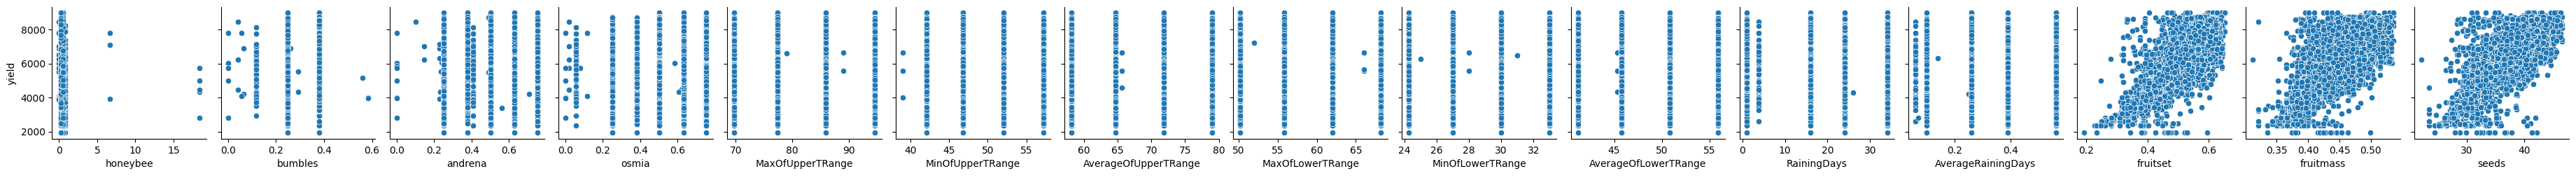

In [ ]:
## Relatioship between variables
sns.pairplot(data=train,
             x_vars=train.columns[1:16],
             y_vars='yield')

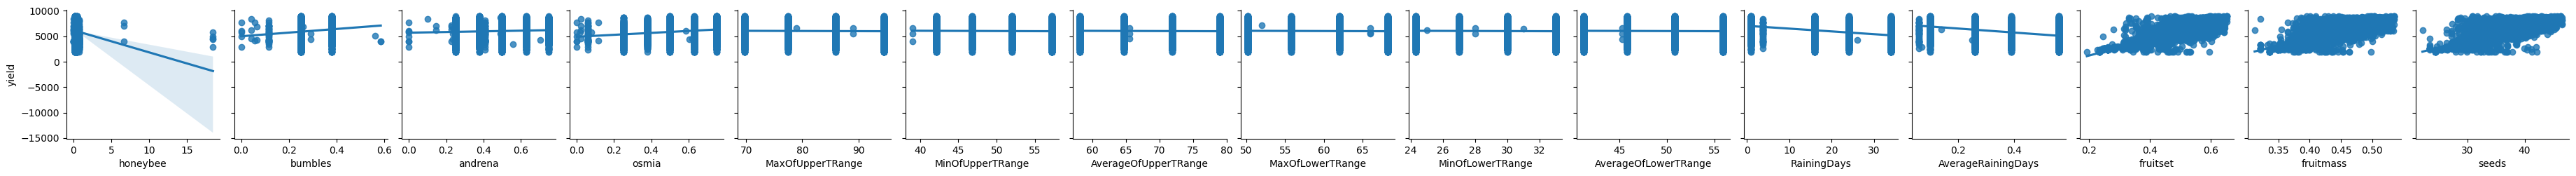

In [ ]:
sns.pairplot(data=train,
             x_vars=train.columns[1:16],
             y_vars='yield', kind='reg')

DATA PROCESSING

In [ ]:
scaler = StandardScaler()
train_scaler = scaler.fit_transform(train)
train_scaler = pd.DataFrame(train_scaler, columns= ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds','yield'])

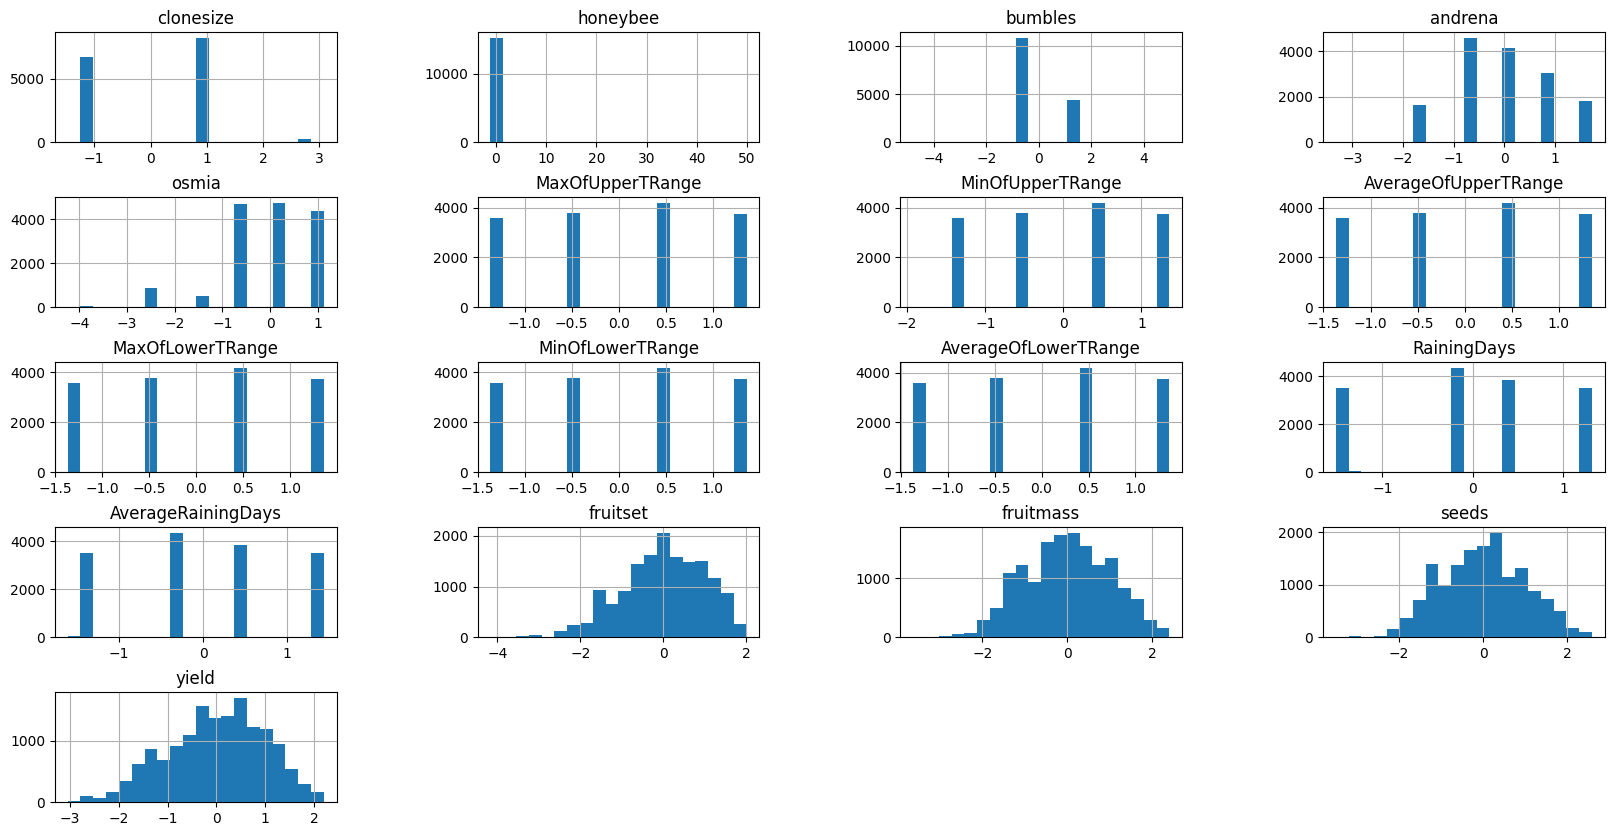

In [ ]:
## distribution of the data
train_scaler.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

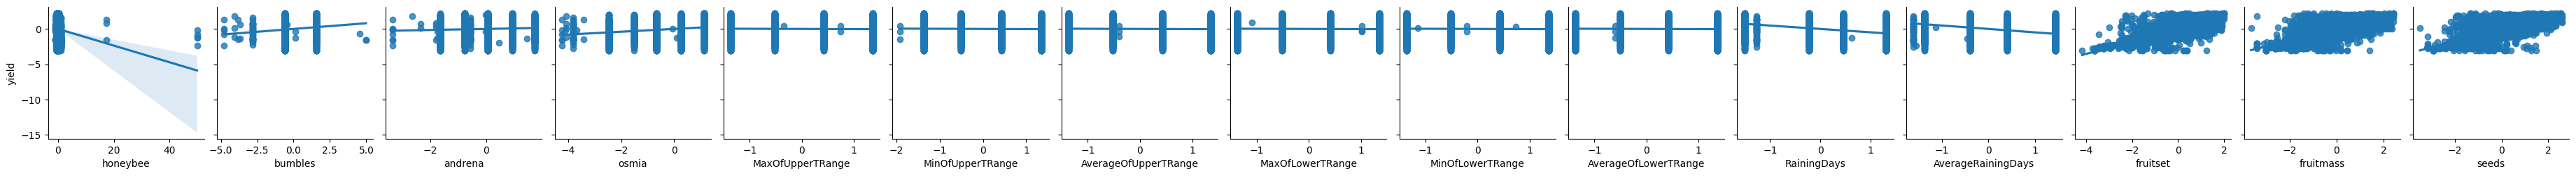

In [ ]:
sns.pairplot(data=train_scaler,
             x_vars=train_scaler.columns[1:16],
             y_vars='yield', kind='reg')

MODELING

In [ ]:
x = train.drop(['yield'], axis=1)
y = train['yield']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 57, test_size = .3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10702, 16) (10702,) (4587, 16) (4587,)


In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
y_pred

## print('accuracy_score',accuracy_score(y_test, y_pred))
print('r2_score',r2_score(y_pred, y_test))
print('mean_squared_errot',mean_squared_error(y_pred, y_test))
print("RMSE",math.sqrt(mean_squared_error(y_pred,y_test)))

r2_score 0.774401611799118
mean_squared_errot 325321.91670272255
RMSE 570.3699822945827


In [ ]:
## Cross validated Modelling
scores = cross_val_score(LinearRegression(),
                        x_train,y_train,
                        cv=5,
                        scoring='r2')
print(scores,scores.mean())

[ 0.79352655  0.70087439  0.8158377  -0.44129199  0.80443402] 0.5346761343215496


In [ ]:
## using pipleines
poly_pipe = make_pipeline(PolynomialFeatures(degree=1),
                          StandardScaler(),
                          LinearRegression())
scores = cross_val_score(poly_pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[ 0.79352655  0.70087439  0.8158377  -0.44129199  0.80443402] 0.5346761343215527


In [ ]:
## using pipeline with ridge regression
poly_pipe = make_pipeline(Ridge(alpha=0.1))
scores = cross_val_score(poly_pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[ 0.79334744  0.69087431  0.81602647 -0.40505331  0.8041529 ] 0.5398695624135563
